In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

dataSet = 'https://raw.githubusercontent.com/franzimbi/TA047R-2C2024-GRUPO03/refs/heads/main/tp1/dataSets/playlist_spotify.csv?token=GHSAT0AAAAAACVP4BK6O3HPQPG233RVW2BSZYJREEQ'
dataSet = pd.read_csv(dataSet)

##A
Suponemos poder separar el dataSet en grupos donde los ritmos y estilos de musica sean similares. a priori podriamos mirar cada columna individual y separarla por grupos, pero debe haber una forma mas inteligente de combinar las features y dividirlos en k grupos.

In [39]:
dataSet.head(10)

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.713         0.514    100125   0.521          0.816000    8   
1         0.192         0.714    207019   0.614          0.000000    4   
2         0.333         0.630    216200   0.455          0.000004    5   
3         0.601         0.810    136413   0.221          0.210000    5   
4         0.883         0.465    181440   0.459          0.000173    6   
5         0.524         0.633    244360   0.401          0.000000    4   
6         0.597         0.507    183573   0.795          0.000000    9   
7         0.452         0.825    259102   0.435          0.609000    1   
8         0.748         0.420    366179   0.324          0.839000    9   
9         0.913         0.292    197613   0.246          0.088300    0   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.1120   -14.835     0       0.0444  119.879               4    0.143  
1    0.2630    -6.935     1       0.0319  123.969               4    0.582  
2    0.1270    -9.290     1       0.0292  139.931               4    0.199  
3    0.1840   -11.005     1       0.0429  109.960               4    0.798  
4    0.0692    -8.137     0       0.0351   90.807               4    0.288  
5    0.1230   -12.549     1       0.0439  134.978               4    0.523  
6    0.2960    -6.966     1       0.0607  165.540               4    0.900  
7    0.0953    -9.582     1       0.0568  119.038               4    0.243  
8    0.0723   -14.700     0       0.0556  183.020               3    0.330  
9    0.2090    -9.758     1       0.0330  140.316               4    0.249

In [40]:
# normalizo con min max las variables

cols_to_normalize = ['duration', 'loudness', 'tempo', 'key', 'time_signature']

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()
dataSet[cols_to_normalize] = scaler.fit_transform(dataSet[cols_to_normalize])
dataSet.head(10)

acousticness  danceability  duration  energy  instrumentalness       key  \
0         0.713         0.514  0.103325   0.521          0.816000  0.727273   
1         0.192         0.714  0.269951   0.614          0.000000  0.363636   
2         0.333         0.630  0.284262   0.455          0.000004  0.454545   
3         0.601         0.810  0.159891   0.221          0.210000  0.454545   
4         0.883         0.465  0.230079   0.459          0.000173  0.545455   
5         0.524         0.633  0.328158   0.401          0.000000  0.363636   
6         0.597         0.507  0.233403   0.795          0.000000  0.818182   
7         0.452         0.825  0.351138   0.435          0.609000  0.090909   
8         0.748         0.420  0.518049   0.324          0.839000  0.818182   
9         0.913         0.292  0.255289   0.246          0.088300  0.000000   

   liveness  loudness  mode  speechiness     tempo  time_signature  valence  
0    0.1120  0.507981     0       0.0444  0.432113            0.75    0.143  
1    0.2630  0.779758     1       0.0319  0.459671            0.75    0.582  
2    0.1270  0.698741     1       0.0292  0.567220            0.75    0.199  
3    0.1840  0.639741     1       0.0429  0.365280            0.75    0.798  
4    0.0692  0.738406     0       0.0351  0.236229            0.75    0.288  
5    0.1230  0.586624     1       0.0439  0.533848            0.75    0.523  
6    0.2960  0.778691     1       0.0607  0.739770            0.75    0.900  
7    0.0953  0.688695     1       0.0568  0.426446            0.75    0.243  
8    0.0723  0.512626     0       0.0556  0.857548            0.50    0.330  
9    0.2090  0.682641     1       0.0330  0.569814            0.75    0.249

## B

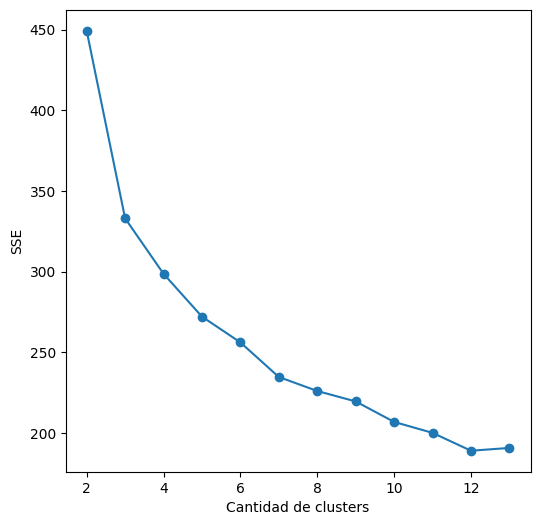

In [41]:
# analizo el codo entre 2 y 14
sse = []
list_k = list(range(2, 14))
columns_of_interest = ['acousticness',	'danceability',	'duration','energy', 'instrumentalness',	'key',	'liveness',	'loudness',	'mode',	'speechiness',	'tempo',	'time_signature',	'valence']
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(dataSet[columns_of_interest])
    sse.append(km.inertia_)

# Grafico el SSE (Sum of Squared Errors) por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

el codo no es muy claro, pero esta al rededor del k=[2,3]

---

porque es donde empieza a aplanarse la curva


## C

In [42]:
# calculo silhouette
list_k = list(range(2, 8))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dataSet[columns_of_interest])
    score = silhouette_score(dataSet[columns_of_interest], preds)
    print ("para K = " + str(n_clusters) + " silhouette score es " + str(score))

para K = 2 silhouette score es 0.3073751220809698
para K = 3 silhouette score es 0.2818500174749647
para K = 4 silhouette score es 0.21911195767857922
para K = 5 silhouette score es 0.2335935449151065
para K = 6 silhouette score es 0.19880380789362098
para K = 7 silhouette score es 0.20994465010605945


## D

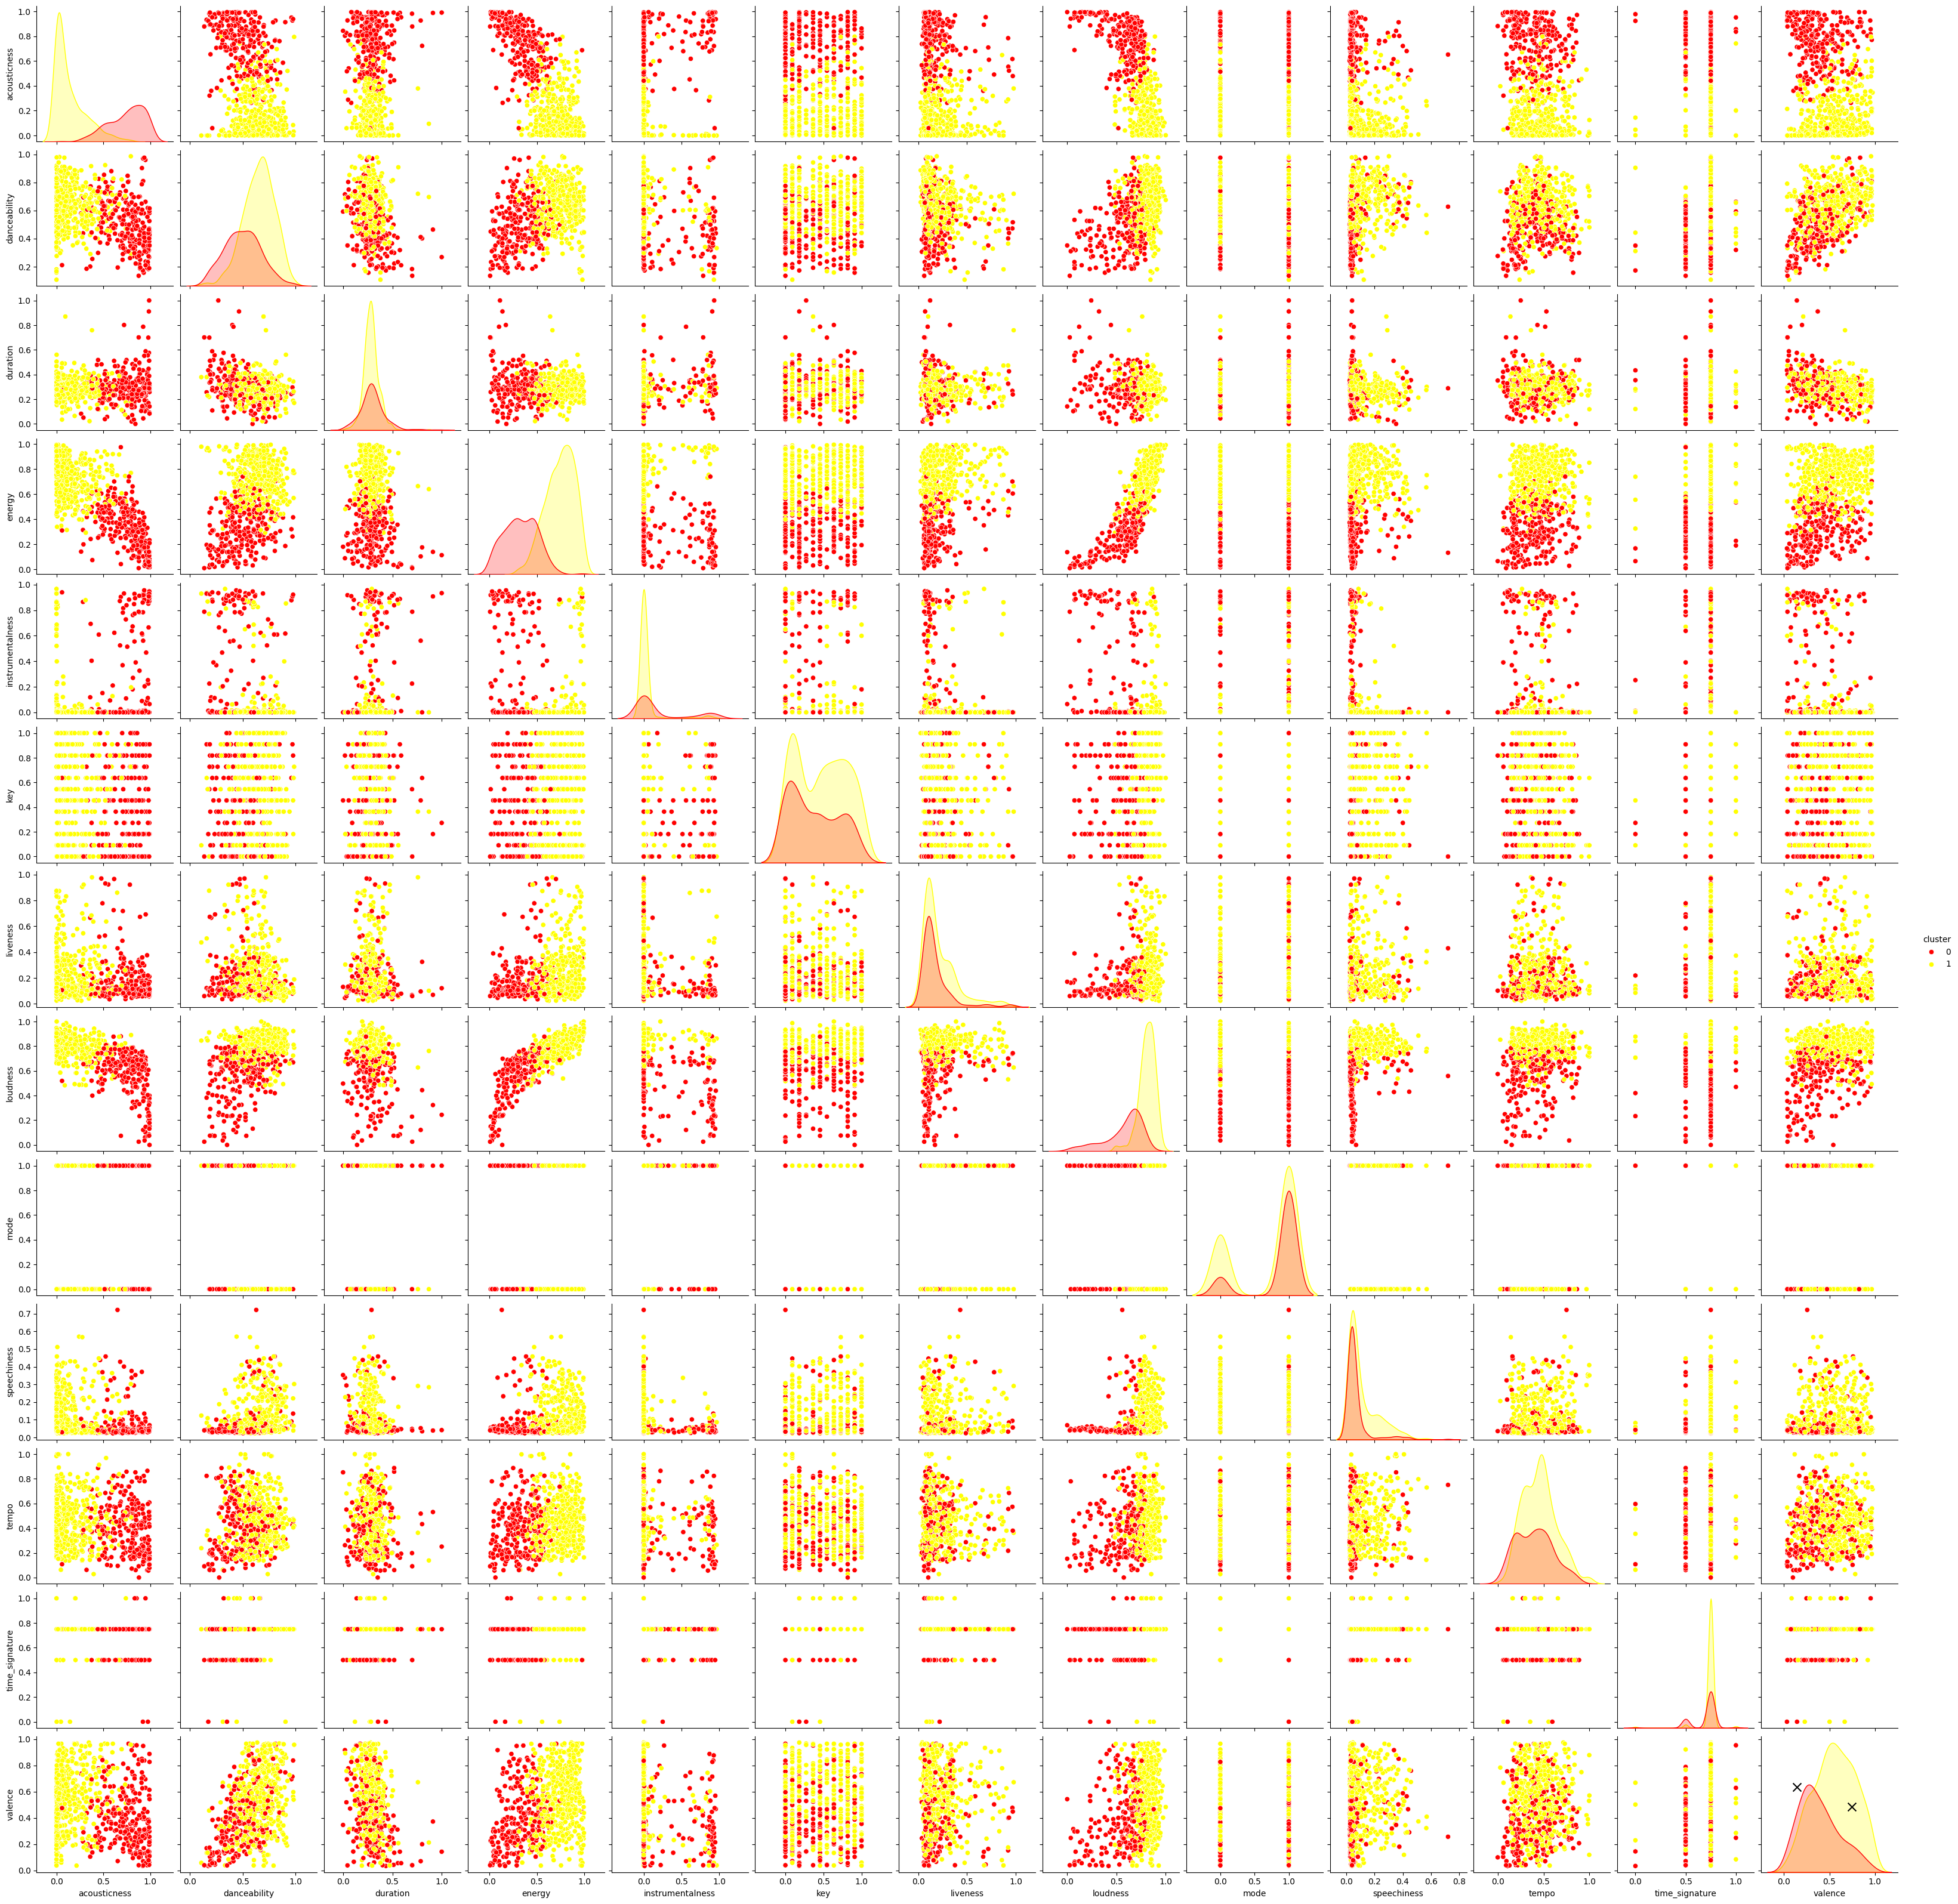

In [43]:
# pairplot entre cada feature
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(dataSet[columns_of_interest])

dataSet['cluster'] = kmeans.labels_

# centroides de los clusters
centroids = kmeans.cluster_centers_

# pairplot con colores para cada cluster
sns.pairplot(dataSet, vars=columns_of_interest, hue='cluster', palette=['red', 'yellow'], diag_kind='kde')

# Agregar los centroides al pairplot
for i in range(n_clusters):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=100, color='black')

plt.show()

Parece que el acousticness, danceability y energy  son las caracteristicas donde mas facil se ve una separacion de los grupos. El resto de las caracteristicas suenen contener a la otra de alguna forma

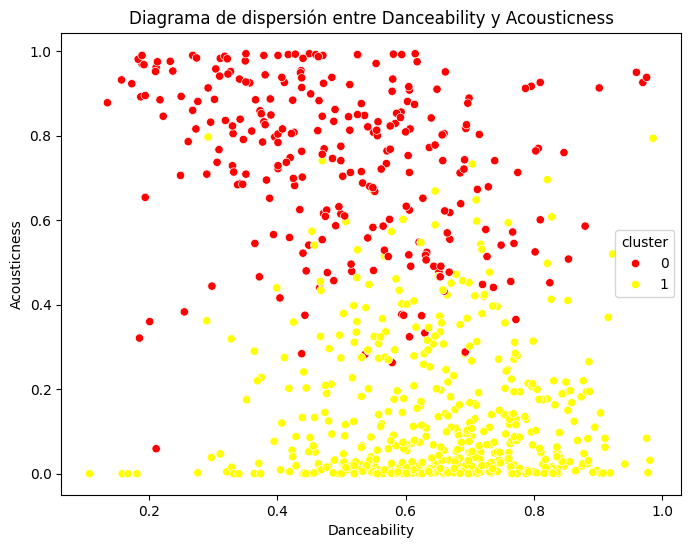

In [44]:
# diagrama de dispersión entre danceability y acusticness

plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='acousticness', hue='cluster', data=dataSet, palette=['red', 'yellow'])
plt.title('Diagrama de dispersión entre Danceability y Acousticness')
plt.xlabel('Danceability')
plt.ylabel('Acousticness')
plt.show()

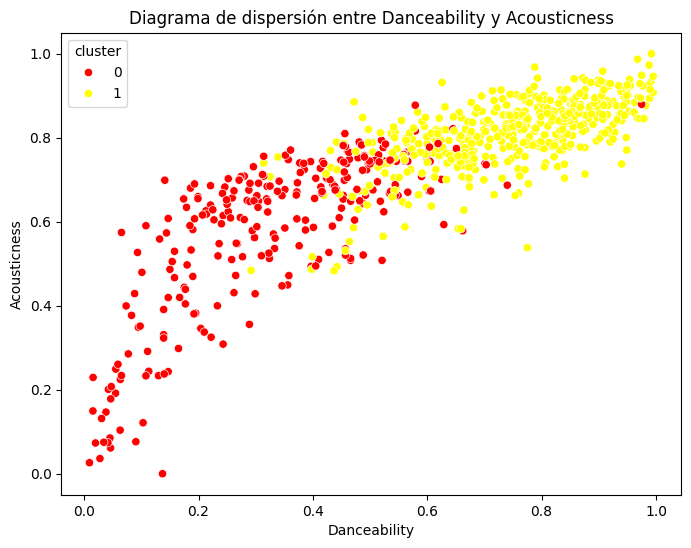

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='loudness', hue='cluster', data=dataSet, palette=['red', 'yellow'])
plt.title('Diagrama de dispersión entre Danceability y Acousticness')
plt.xlabel('Danceability')
plt.ylabel('Acousticness')
plt.show()

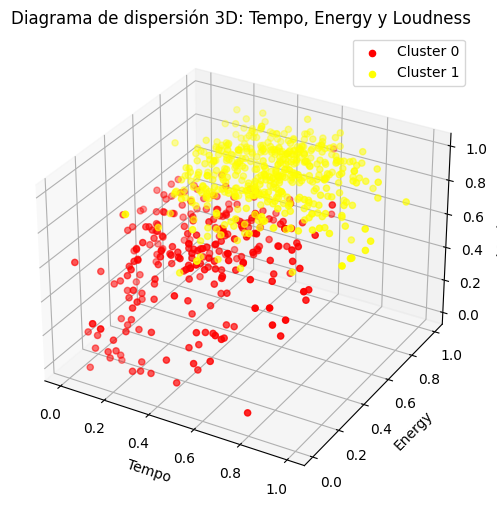

In [46]:
# diagrama de dispersión entre tempo, energy y loudness en 3d. color rojo y amarillo los clousters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataSet['tempo'][dataSet.cluster == 0], dataSet['energy'][dataSet.cluster == 0], dataSet['loudness'][dataSet.cluster == 0], c='red', label='Cluster 0')
ax.scatter(dataSet['tempo'][dataSet.cluster == 1], dataSet['energy'][dataSet.cluster == 1], dataSet['loudness'][dataSet.cluster == 1], c='yellow', label='Cluster 1')

ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Loudness')
ax.set_title('Diagrama de dispersión 3D: Tempo, Energy y Loudness')
plt.legend()
plt.show()